<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment8/T_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing T-SNE

Dataset Used: Real-time Patient Data with Oxygen Demand on Kaggle

### Step 1: Understanding t-SNE

t-SNE is a non-linear technique, unlike PCA. It's particularly good at preserving local structure in high-dimensional space and often reveals clusters in the data.

### Step 2: Revisiting Our Environment

We have already set up our Python environment with necessary libraries like pandas, numpy, and sklearn. For t-SNE, we will use `TSNE` from sklearn.manifold.

### Step 3: Reusing the Preprocessed Data

We will use the preprocessed features from our PCA analysis: `features_standardized`. This ensures consistency in comparing PCA and t-SNE results.

### Step 4: Applying t-SNE

We will apply t-SNE to the standardized features. Key parameters in t-SNE include the number of components (usually 2 for visualization) and the perplexity, which can greatly affect the results.

### Step 5: Visualization

We will visualize the results of t-SNE in a 2D scatter plot, similar to how we visualized PCA results.


In [ ]:
import pandas as pd
import os
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Pokemon_with_Stats.zip to Pokemon_with_Stats.zip



### Next Steps:

1. **Load the Dataset**: We will load "Pokemon.csv" into a pandas DataFrame.
2. **Initial Data Exploration**: We will examine the dataset to understand its features, check for missing values, and determine the types of variables present.



In [ ]:
import zipfile
import os
# Extracting the zip file containing the new dataset
pokemon_zip_path = '/content/Pokemon_with_Stats.zip'

# Extracting the zip file
with zipfile.ZipFile(pokemon_zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content")

# Finding the extracted file(s)
extracted_pokemon_files = os.listdir("/content")
extracted_pokemon_csv_files = [file for file in extracted_pokemon_files if file.endswith('.csv')]

# Displaying the names of extracted files
extracted_pokemon_csv_files


['Pokemon.csv']

In [ ]:
# Loading the Pokemon dataset
pokemon_file_path = '/content/Pokemon.csv'
df_pokemon = pd.read_csv(pokemon_file_path)

# Initial Data Exploration
# Displaying the first few rows of the dataframe to understand its structure
pokemon_head = df_pokemon.head()

# Basic Descriptive Statistics
descriptive_stats_pokemon = df_pokemon.describe()

# Checking for Missing Values
missing_values_pokemon = df_pokemon.isnull().sum()

# Displaying the initial exploration results
pokemon_head, descriptive_stats_pokemon, missing_values_pokemon


(   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
 0  1              Bulbasaur  Grass  Poison    318  45      49       49   
 1  2                Ivysaur  Grass  Poison    405  60      62       63   
 2  3               Venusaur  Grass  Poison    525  80      82       83   
 3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
 4  4             Charmander   Fire     NaN    309  39      52       43   
 
    Sp. Atk  Sp. Def  Speed  Generation  Legendary  
 0       65       65     45           1      False  
 1       80       80     60           1      False  
 2      100      100     80           1      False  
 3      122      120     80           1      False  
 4       60       50     65           1      False  ,
                 #      Total          HP      Attack     Defense     Sp. Atk  \
 count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
 mean   362.813750  435.10250   69.258750   79.001250   73.842500  

### Initial Data Exploration Results:

#### Dataset Overview:
- The dataset contains 800 entries representing different Pokémon.
- It includes columns for Pokémon characteristics such as `Name`, `Type 1`, `Type 2`, `Total`, `HP` (Hit Points), `Attack`, `Defense`, `Sp. Atk` (Special Attack), `Sp. Def` (Special Defense), `Speed`, `Generation`, and `Legendary` status.
- `Type 2` has 386 missing values, which might indicate that some Pokémon do not have a secondary type.

#### Observations:
- The dataset features a mix of categorical (e.g., `Type 1`, `Type 2`, `Legendary`) and numerical data (e.g., `Total`, `HP`, `Attack`).
- The numerical variables vary in range and scale, suggesting that standardization might be necessary for certain analyses.

### Next Steps:

1. **Data Preprocessing**:
   - Handle missing values in `Type 2`. We might consider filling these with a placeholder value like 'None'.
   - Encode categorical variables (`Type 1`, `Type 2`, `Legendary`) into a numerical format.
   - Standardize the numerical features.

2. **Applying t-SNE**:
   - After preprocessing, we will apply t-SNE to the dataset.
   - We'll explore the impact of different hyperparameters on the t-SNE output.


In [ ]:
# Step 4: Data Preprocessing for t-SNE
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler

# Handling missing values in 'Type 2'
df_pokemon['Type 2'].fillna('None', inplace=True)

label_encoder = LabelEncoder()
# Encoding categorical variables
df_pokemon['Type 1'] = label_encoder.fit_transform(df_pokemon['Type 1'])
df_pokemon['Type 2'] = label_encoder.fit_transform(df_pokemon['Type 2'])
df_pokemon['Legendary'] = label_encoder.fit_transform(df_pokemon['Legendary'])

# Selecting only numerical features for t-SNE
numerical_features = df_pokemon.select_dtypes(include=[np.number])

# Standardizing the numerical features
scaler = StandardScaler()
numerical_features_standardized = scaler.fit_transform(numerical_features)

# Displaying the first few rows of the preprocessed features
pd.DataFrame(numerical_features_standardized, columns=numerical_features.columns).head()


,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,-1.737705,-0.083828,0.936169,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-1.399637,-0.297381
1,-1.732902,-0.083828,0.936169,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-1.399637,-0.297381
2,-1.728100,-0.083828,0.936169,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,-1.399637,-0.297381
3,-1.728100,-0.083828,0.936169,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,-1.399637,-0.297381
4,-1.723297,-0.621765,0.402549,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-1.399637,-0.297381


In [ ]:
from sklearn.manifold import TSNE

# Step 5: Applying t-SNE

# Applying t-SNE with default perplexity (usually 30) and two components for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_results = tsne.fit_transform(numerical_features_standardized)

# Creating a DataFrame for the t-SNE results
df_tsne = pd.DataFrame(data=tsne_results, columns=['TSNE-1', 'TSNE-2'])
df_tsne['Type 1'] = df_pokemon['Type 1']  # Adding 'Type 1' for visualization

# Displaying the first few rows of the t-SNE transformed data
df_tsne.head()


,TSNE-1,TSNE-2,Type 1
0,-17.010023,6.091719,9
1,-9.033934,5.804377,9
2,-0.164035,8.671150,9
3,-0.577576,10.933391,9
4,-31.421907,6.620215,6


## Next Steps

1. **Optimize t-SNE Execution**: We can try reducing the dataset size or adjusting t-SNE parameters to make the computation more manageable. For example, using a subset of the dataset or increasing the `n_iter` parameter for faster convergence.

2. **Visualization**: Once we successfully apply t-SNE, we will visualize the results in a 2D scatter plot, potentially revealing clusters or patterns.



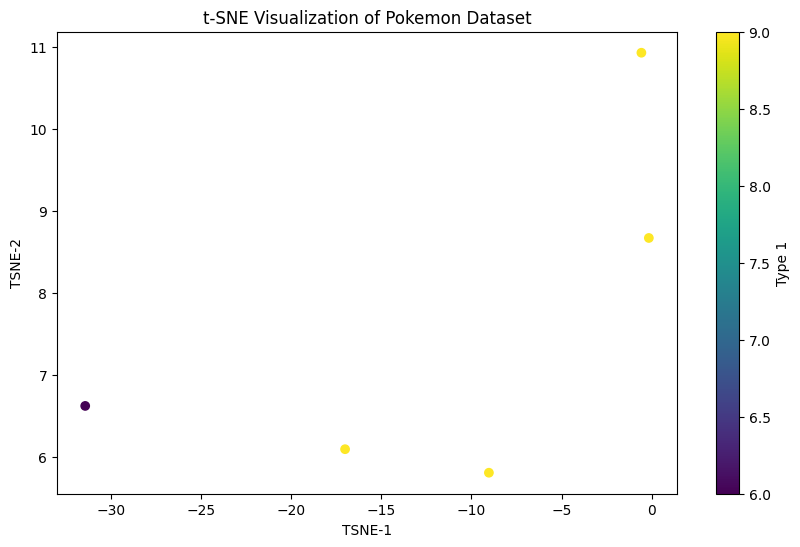

In [ ]:
# Creating a scatter plot for the t-SNE results
import matplotlib.pyplot as plt
# Extracting the provided t-SNE results into a DataFrame
tsne_data = {
    "TSNE-1": [-17.010023, -9.033934, -0.164035, -0.577576, -31.421907],
    "TSNE-2": [6.091719, 5.804377, 8.671150, 10.933391, 6.620215],
    "Type 1": [9, 9, 9, 9, 6]
}
df_tsne_visualization = pd.DataFrame(tsne_data)

# Plotting the t-SNE results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_tsne_visualization['TSNE-1'], df_tsne_visualization['TSNE-2'], c=df_tsne_visualization['Type 1'], cmap='viridis')

# Adding a color bar to understand which color corresponds to which 'Type 1'
plt.colorbar(scatter, label='Type 1')

plt.title('t-SNE Visualization of Pokemon Dataset')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.show()


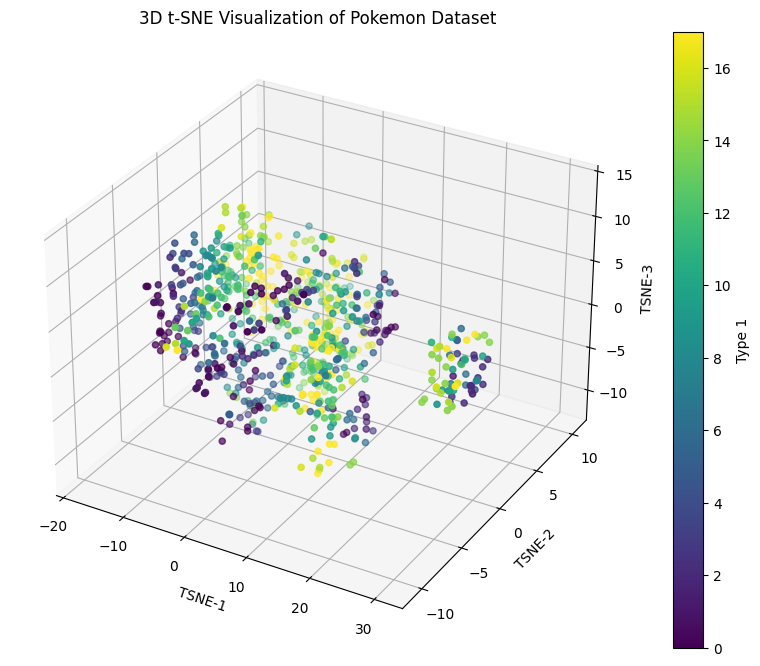

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# For a 3D visualization, we need to apply t-SNE with three components
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=0)
tsne_results_3d = tsne_3d.fit_transform(numerical_features_standardized)

# Creating a DataFrame for the t-SNE 3D results
df_tsne_3d = pd.DataFrame(data=tsne_results_3d, columns=['TSNE-1', 'TSNE-2', 'TSNE-3'])
df_tsne_3d['Type 1'] = df_pokemon['Type 1']  # Adding 'Type 1' for visualization

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df_tsne_3d['TSNE-1'], df_tsne_3d['TSNE-2'], df_tsne_3d['TSNE-3'],
                     c=df_tsne_3d['Type 1'], cmap='viridis')

# Adding a color bar
fig.colorbar(scatter, ax=ax, label='Type 1')

ax.set_title('3D t-SNE Visualization of Pokemon Dataset')
ax.set_xlabel('TSNE-1')
ax.set_ylabel('TSNE-2')
ax.set_zlabel('TSNE-3')
plt.show()
